# Heart Disease UCI¶
 ## Acknowledgements Creators:


Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Link https://www.kaggle.com/ronitf/heart-disease-uci

Attribute description:
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defec

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heart_disease = pd.read_csv('heart_disease.csv')

In [10]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
thal_values = heart_disease['thal'].unique()
slope_values = heart_disease['slope'].unique()
restecg_values = heart_disease['restecg'].unique()
cpain_values = heart_disease['cp'].unique()

# Findings:

**Write down findings from the tables above

- Thal: 1= Normal, 2 = Fixed defect and 3 = Reversible defect. Must work on the 0s
- Slope: 0=upsloping,1=downsloping,2=flat
- Restecg: 0 = normal, 1=having ST abnormality, 2=showing ventricular hypertrophy


In [24]:
pivot_1 = heart_disease.pivot_table(values= 'thalach',index='exang',columns='fbs',aggfunc='mean')

# Visualization of aggregation on our data



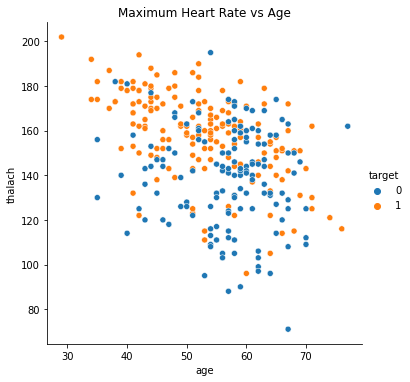

In [36]:
g1 = sns.relplot(data=heart_disease,x='age',y='thalach',hue='target')
g1.set(title='Maximum Heart Rate vs Age')

On average, patients with heart disease reached higher maximum heart rates, than those patients with no heart disease.

In [37]:
hr_v = heart_disease[['thalach','exang','oldpeak','slope','ca','thal','target']]

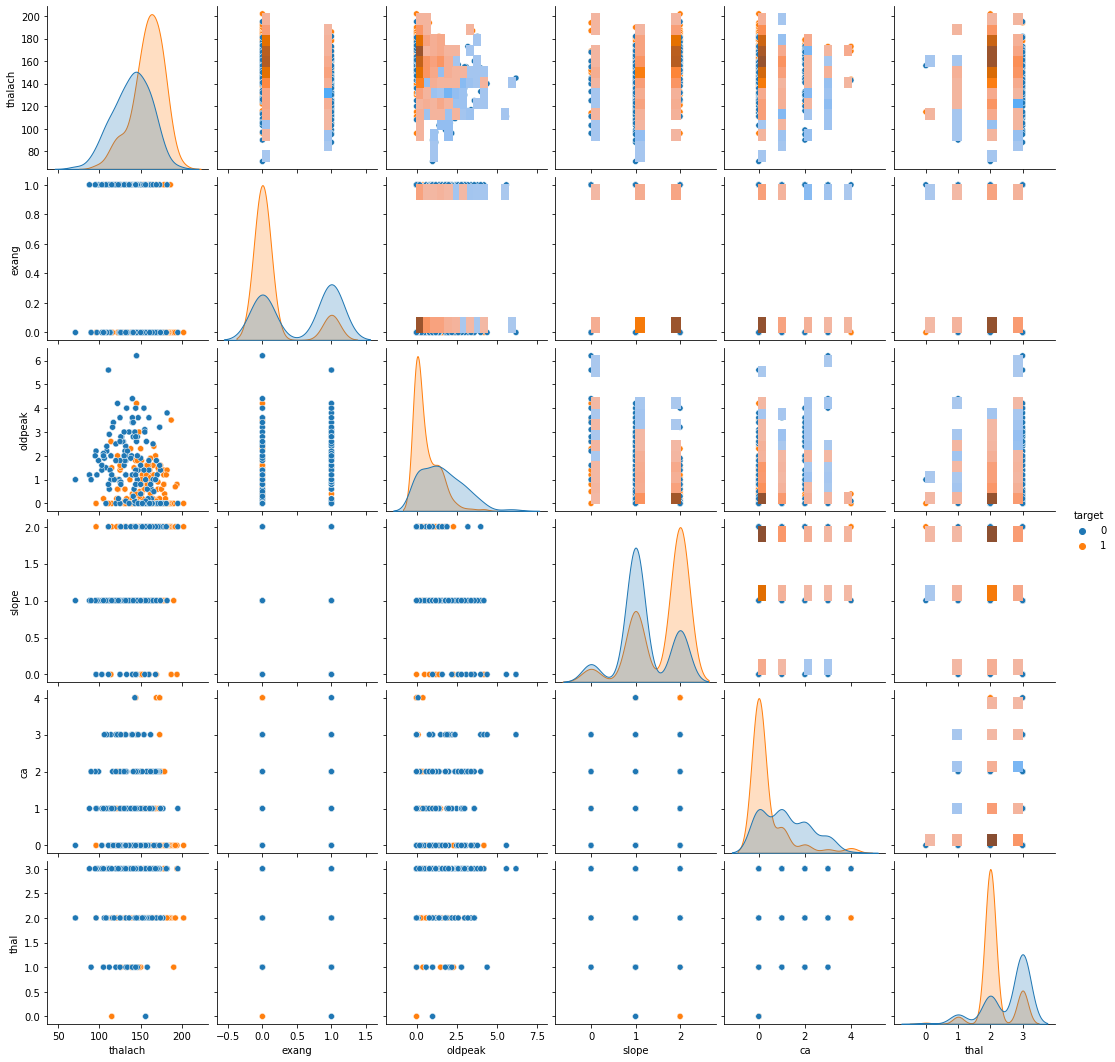

In [41]:
g2 = sns.pairplot(hr_v,hue='target')
g2.map_upper(sns.histplot)
g2.map_lower(sns.scatterplot)